<a href="https://colab.research.google.com/github/irmtou/CS577FinalProject/blob/main/CS577FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ca_san_diego_2020_04_01.csv')
display(df.head(10))

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,1,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,3,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,4,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,5,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
5,6,2014-01-01,08:39:00,820,30.0,hispanic,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Equipment Violation,Verbal Warning,HISPANIC
6,7,2014-01-01,09:13:00,710,19.0,hispanic,female,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,HISPANIC
7,8,2014-01-01,09:50:00,120,32.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Written Warning,WHITE
8,9,2014-01-01,10:00:00,120,36.0,white,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
9,10,2014-01-01,10:40:00,120,27.0,hispanic,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,HISPANIC



From observations, here is a reference of all categories
* Index - Indexing from 0
* `raw_row_number` - Indexing from 1
* `date` - yyyy-mm-dd
* `time` - 01:25:00
* `service_area` - Integer
* `subject_age` - Float
* `subject_race` - String
* `subject_sex` - String
* `type` - String
* `arrest_made` - Boolean
* `citation_issued` - String
* `outcome` - String
* `contraband_found` - NaN  
* `search_conducted` - Boolean
* `search_person` - Boolean
* `search_vehicle` - Boolean
* `search_basis` - NaN
* `reason_for_search` - NaN
* `reason_for_stop` - String
* `raw_action_taken` - String
* `raw_subject_race_description` - String



## Some Exploratory Data Analysis

Just a surface level analysis of our dataset


### Datatypes of variables


- Numerical data: `float64`, `int64`
- Categorical data: `object`  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21386 entries, 0 to 21385
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   raw_row_number                21386 non-null  object 
 1   date                          21386 non-null  object 
 2   time                          21386 non-null  object 
 3   service_area                  21386 non-null  object 
 4   subject_age                   20937 non-null  float64
 5   subject_race                  21335 non-null  object 
 6   subject_sex                   21365 non-null  object 
 7   type                          21386 non-null  object 
 8   arrest_made                   21315 non-null  object 
 9   citation_issued               20780 non-null  object 
 10  warning_issued                20780 non-null  object 
 11  outcome                       19840 non-null  object 
 12  contraband_found              1371 non-null   object 
 13  s

## Number of null values in the dataset

In [4]:
missing_values = df.isnull().sum()
missing_values

,0
raw_row_number,0
date,0
time,0
service_area,0
subject_age,449
subject_race,51
subject_sex,21
type,0
arrest_made,71
citation_issued,606


## Finding the percentage of null or missing values

In [5]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

,0
raw_row_number,0.000000
date,0.000000
time,0.000000
service_area,0.000000
subject_age,2.099504
subject_race,0.238474
subject_sex,0.098195
type,0.000000
arrest_made,0.331993
citation_issued,2.833629


## Checking for duplicates

In [6]:
df.nunique()

,0
raw_row_number,21386
date,48
time,1352
service_area,23
subject_age,82
subject_race,5
subject_sex,2
type,1
arrest_made,2
citation_issued,2


## Split yyyy-mm-dd into Year, Month, and Day

In [7]:
df['date']= pd.to_datetime(df['date'],format='%Y-%m-%d')
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day


# Split hh-mm-ss into Hour, Minute, and Second

In [8]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute
df['second'] = df['time'].dt.second

# Frequency of Traffic Stops by each Hour

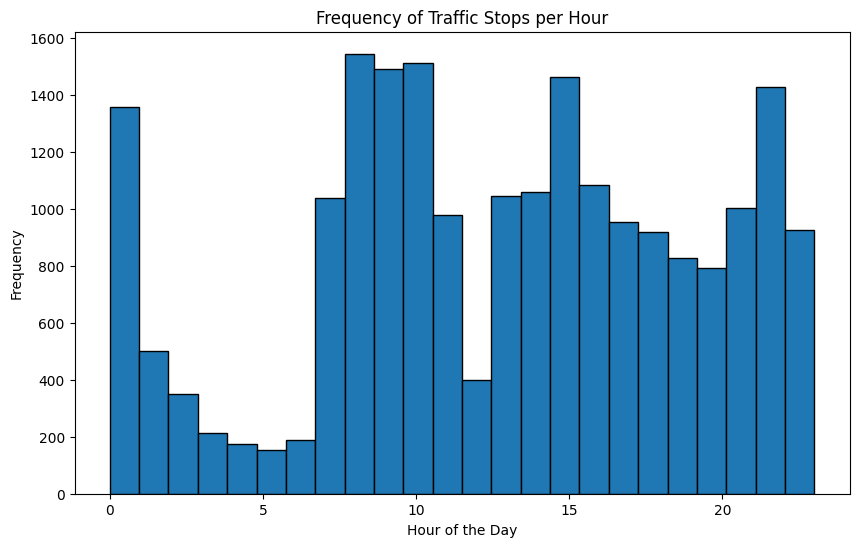

In [9]:
df['hour'].plot(kind='hist', bins=24, edgecolor='black', figsize=(10, 6))

plt.title("Frequency of Traffic Stops per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")

plt.show()


# Day Vs Traffic Stops


In [10]:
end_month_citations = df[df['citation_issued'] == True].groupby('day').size()
print(end_month_citations)

# No real correlation

day
1     254
2     241
3     386
4     490
5     614
6     292
7     382
8     392
9     377
10    393
11    494
12    451
13    459
14    566
15    475
16    576
17    506
18    256
19    168
20    184
21    369
22    399
23    421
24    367
25    312
26    160
27    243
28    348
29    394
30    383
31    284
dtype: int64


# Ages

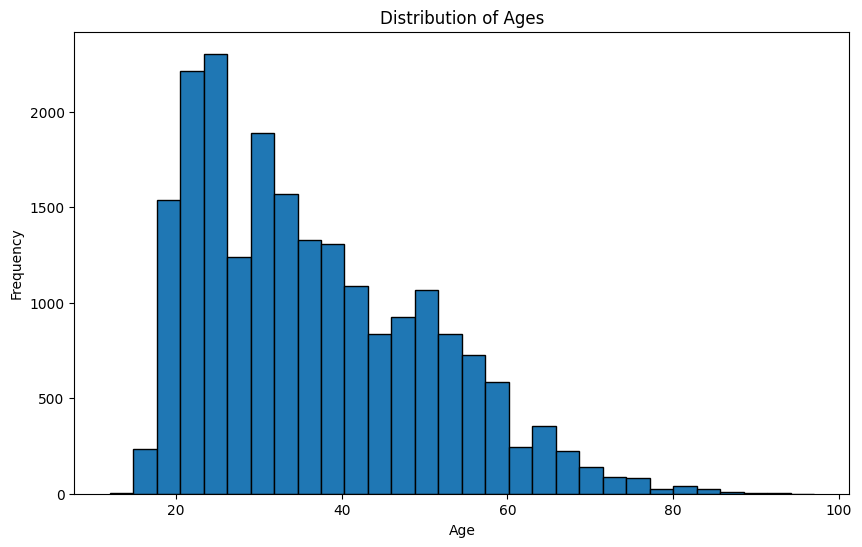

In [11]:
plt.figure(figsize=(10, 6))
df['subject_age'].plot(kind='hist', bins=30, edgecolor='black')

plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Race

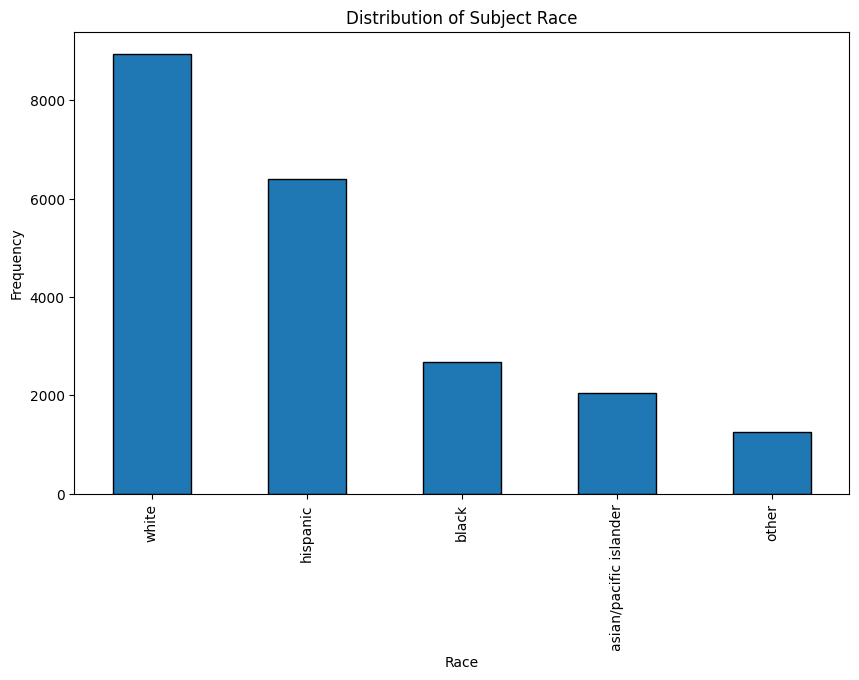

In [12]:
race_counts = df['subject_race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', edgecolor='black')

plt.title("Distribution of Subject Race")
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()

# Race x Age

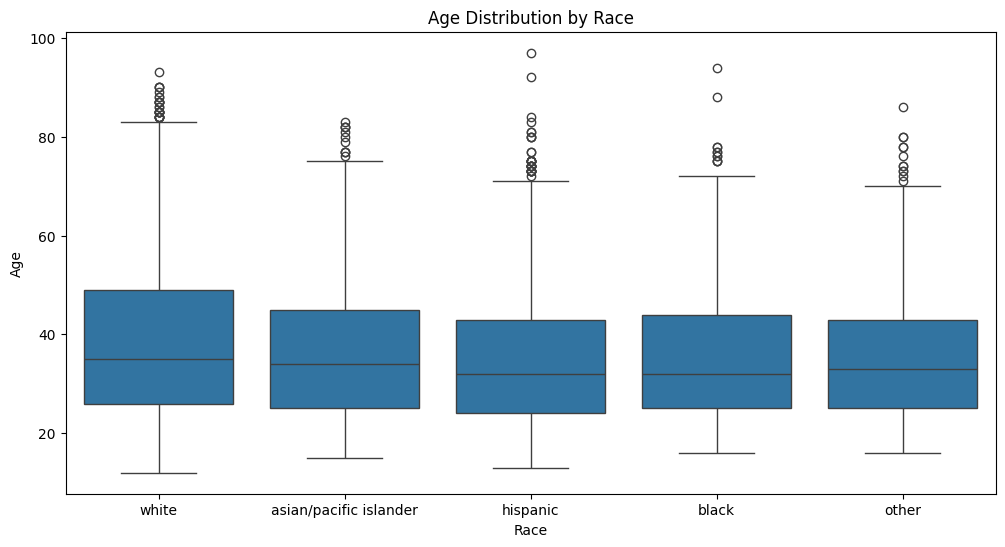

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='subject_race', y='subject_age', data=df)

plt.title("Age Distribution by Race")
plt.xlabel("Race")
plt.ylabel("Age")
plt.show()

# Age by Race (Stacked and Normalized)


<ipython-input-14-d6695adec180>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


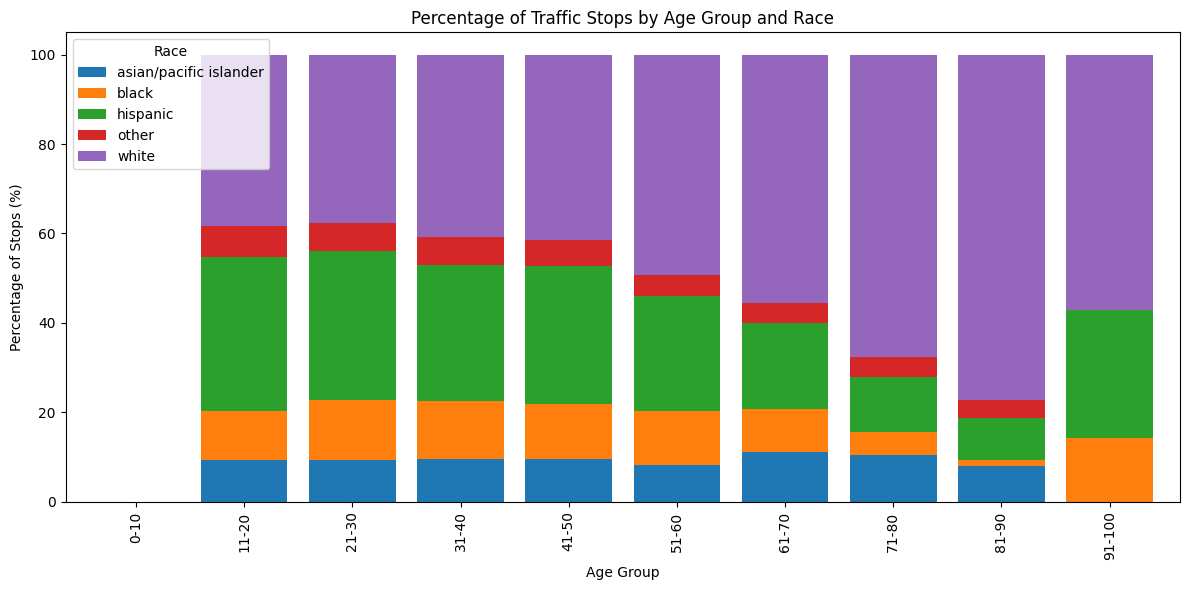

In [14]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)
age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

ax = age_race_percentage.plot(kind='bar', stacked=True, figsize=(12, 6), width = 0.8)

plt.title("Percentage of Traffic Stops by Age Group and Race")
plt.xlabel("Age Group")
plt.ylabel("Percentage of Stops (%)")
plt.legend(title="Race")
plt.tight_layout()
plt.show()

# Age by Race (Stacked with Raw Counts)

<ipython-input-15-9f718657525c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


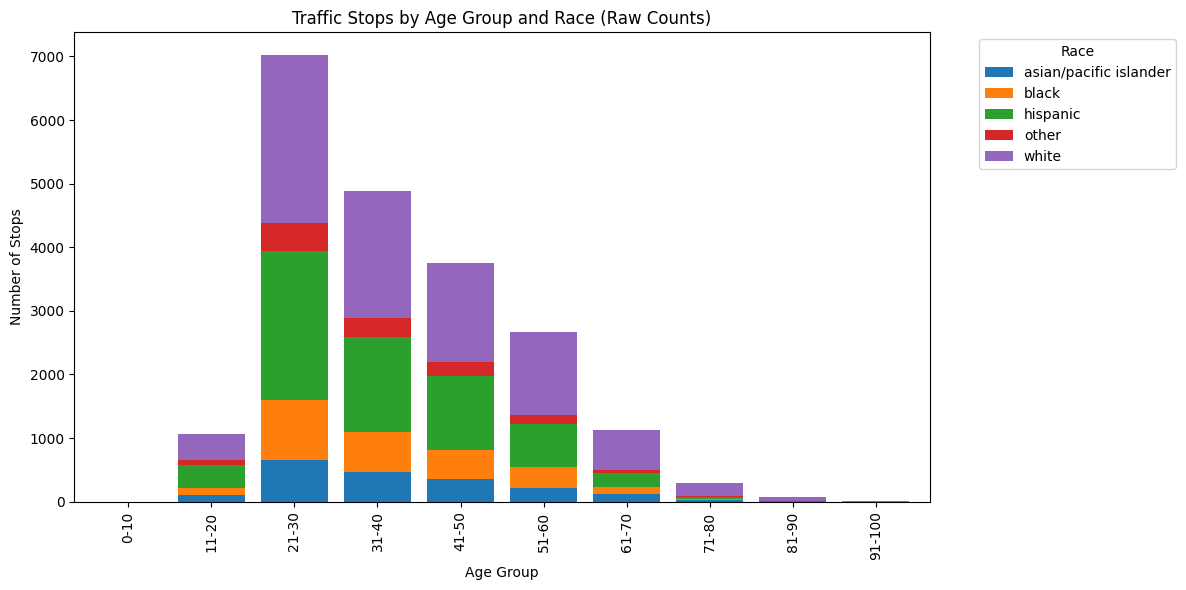

In [15]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_group'] = pd.cut(df['subject_age'], bins=age_bins, labels=age_labels, right=False)

age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

ax = age_race_counts.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8)
plt.title("Traffic Stops by Age Group and Race (Raw Counts)")
plt.xlabel("Age Group")
plt.ylabel("Number of Stops")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


# Age by Race (Grouped)


<ipython-input-16-36d03aed5589>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)


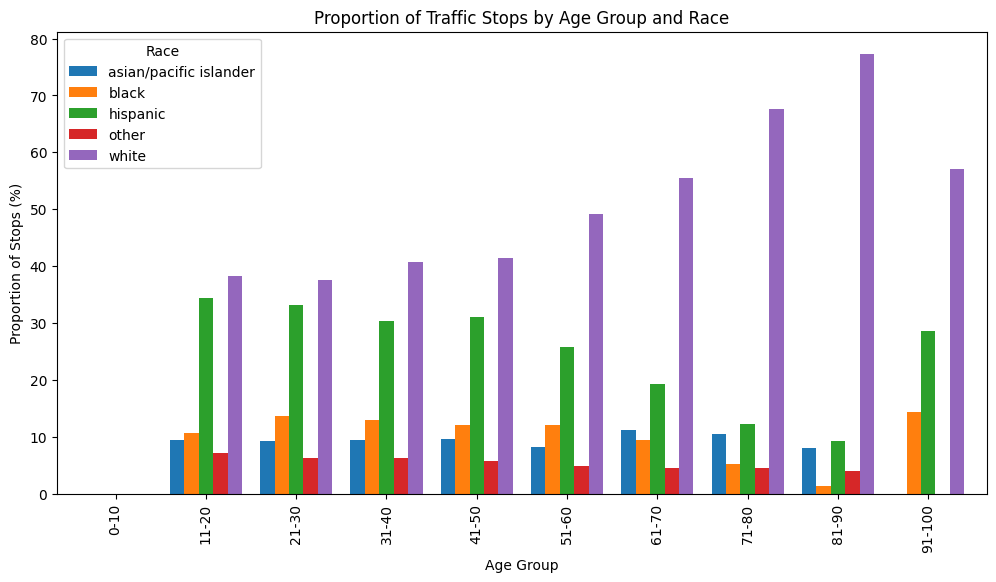

In [16]:
age_race_counts = df.groupby(['age_group', 'subject_race']).size().unstack(fill_value=0)

age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

ax = age_race_percentage.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title("Proportion of Traffic Stops by Age Group and Race")
plt.xlabel("Age Group")
plt.ylabel("Proportion of Stops (%)")
plt.legend(title="Race")
plt.show()

# Officer Evaluation

In [17]:
# search_success_by_service = df[df['search_conducted'] == 'Yes'].groupby('officer_years_of_service')['contraband_found'].mean()
# print(search_success_by_service)

# Women vs Men!
The point of checking the total amount of entries with Citation, Verbal Warning, and Written Warning is to ensure there are enough entries to be able to erase all the ones that have something like "Citation|Verbal Warning| Citation"

In [18]:
#print(df['raw_action_taken'].unique())

a = ((df['raw_action_taken'] == 'Citation').sum())
b = ((df['raw_action_taken'] == 'Verbal Warning').sum())
c = ((df['raw_action_taken'] == 'Written Warning').sum())
total = (df['raw_action_taken'].count())

proportion = (a + b + c) / total
#proportion

df_filtered = df[df['raw_action_taken'].isin(['Citation', 'Verbal Warning', 'Written Warning'])]



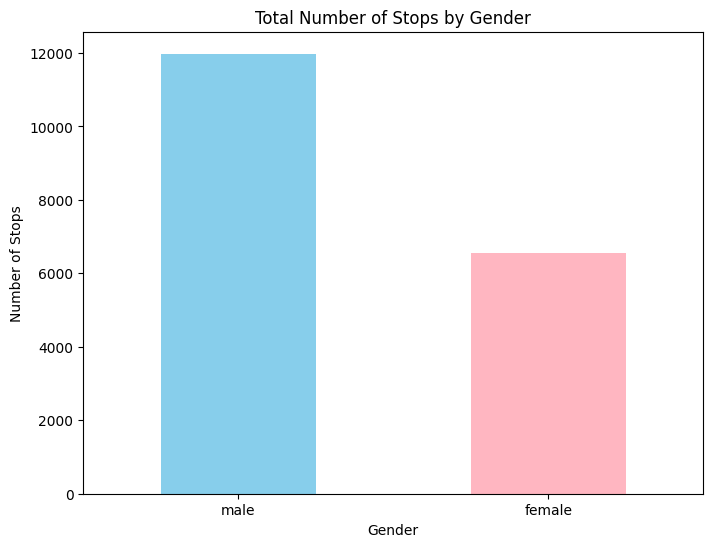

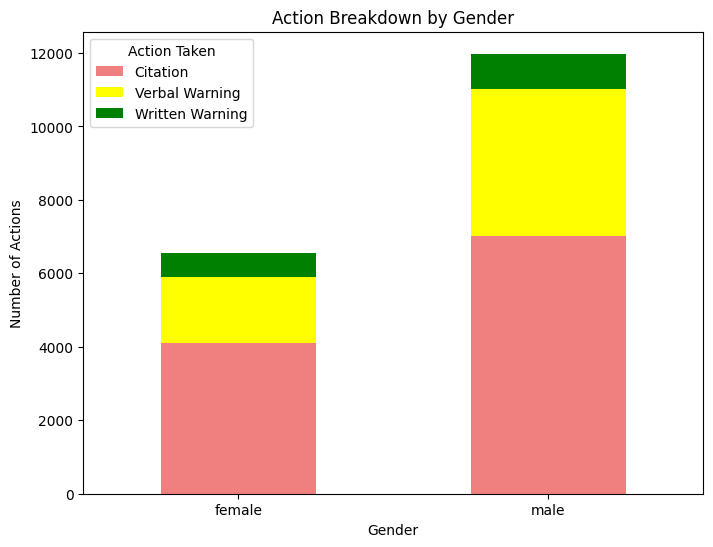

In [19]:
gender_counts = df_filtered['subject_sex'].value_counts()

action_counts = df_filtered.groupby(['subject_sex', 'raw_action_taken']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'])
plt.title('Total Number of Stops by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Stops')
plt.xticks(rotation=0)
plt.show()

# Plotting the action breakdown for each gender
action_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'yellow', 'green'])
plt.title('Action Breakdown by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Actions')
plt.xticks(rotation=0)
plt.legend(title='Action Taken')
plt.show()

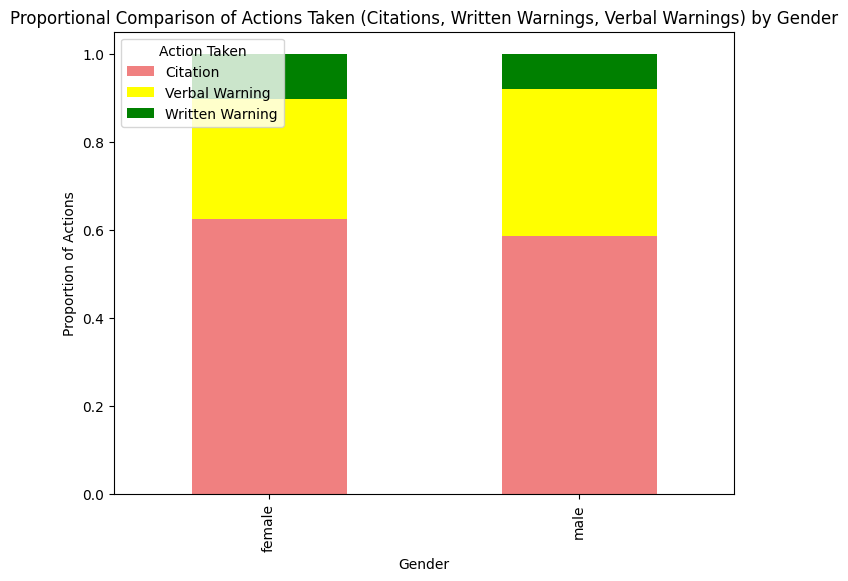

In [20]:
action_counts = df_filtered.groupby(['subject_sex', 'raw_action_taken']).size().unstack(fill_value=0)
action_counts_normalized = action_counts.div(action_counts.sum(axis=1), axis=0)
action_counts_normalized.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightcoral', 'yellow', 'green'])

plt.title('Proportional Comparison of Actions Taken (Citations, Written Warnings, Verbal Warnings) by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Actions')
plt.legend(title='Action Taken', loc='upper left')
plt.show()

# Vehicle information


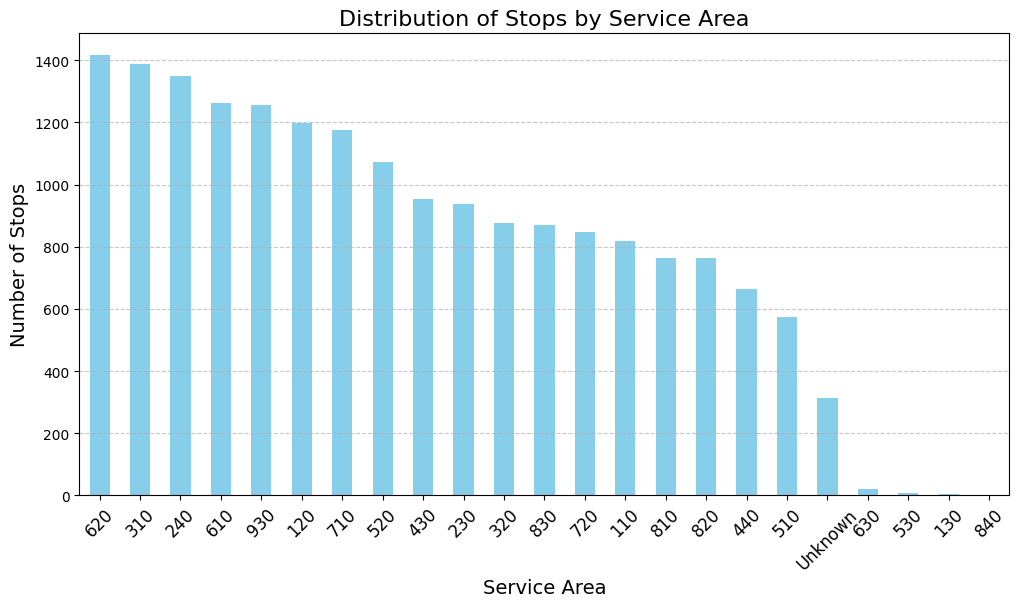

In [21]:

# Plotting a bar chart of stops by service area
stops_by_area = df_filtered['service_area'].value_counts()
stops_by_area.plot(kind='bar', color='skyblue', figsize=(12, 6))

plt.title('Distribution of Stops by Service Area', fontsize=16)
plt.xlabel('Service Area', fontsize=14)
plt.ylabel('Number of Stops', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


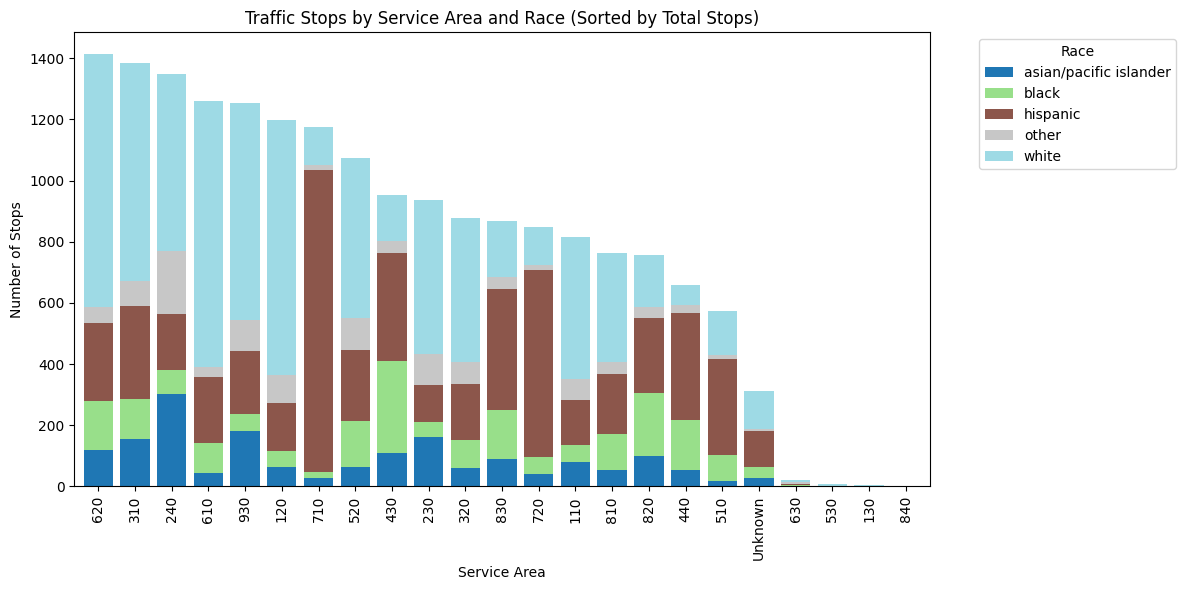

In [22]:
# group data by service area and race
service_area_race_counts = df_filtered.groupby(['service_area', 'subject_race']).size().unstack(fill_value=0)

# sort by total stops in descending order
service_area_race_counts['Total_Stops'] = service_area_race_counts.sum(axis=1)
service_area_race_counts = service_area_race_counts.sort_values(by='Total_Stops', ascending=False)  # Sort by total stops
service_area_race_counts = service_area_race_counts.drop(columns='Total_Stops')  # Remove the total stops column (optional)

# plot the sorted bar chart
ax = service_area_race_counts.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.8, colormap='tab20')
plt.title("Traffic Stops by Service Area and Race (Sorted by Total Stops)")
plt.xlabel("Service Area")
plt.ylabel("Number of Stops")
plt.legend(title="Race", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

In [23]:
# Filter data for a specific service area (e.g., 710)
service_area_710 = df_filtered[df_filtered['service_area'] == 710]

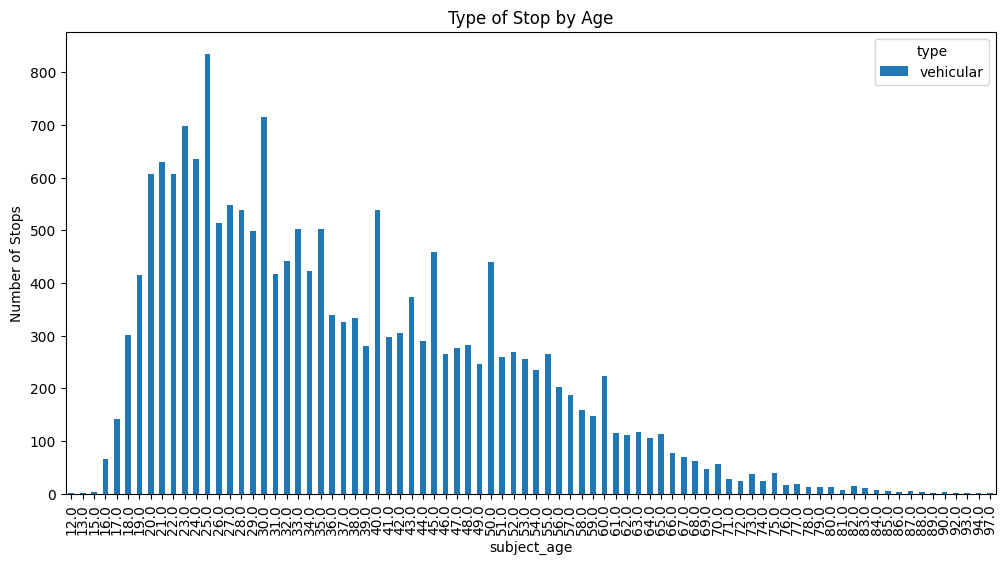

In [24]:
age_type_counts = df_filtered.groupby(['subject_age', 'type']).size().unstack()
age_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Type of Stop by Age')
plt.ylabel('Number of Stops')
plt.show()


<ipython-input-25-0ba49ebff36b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


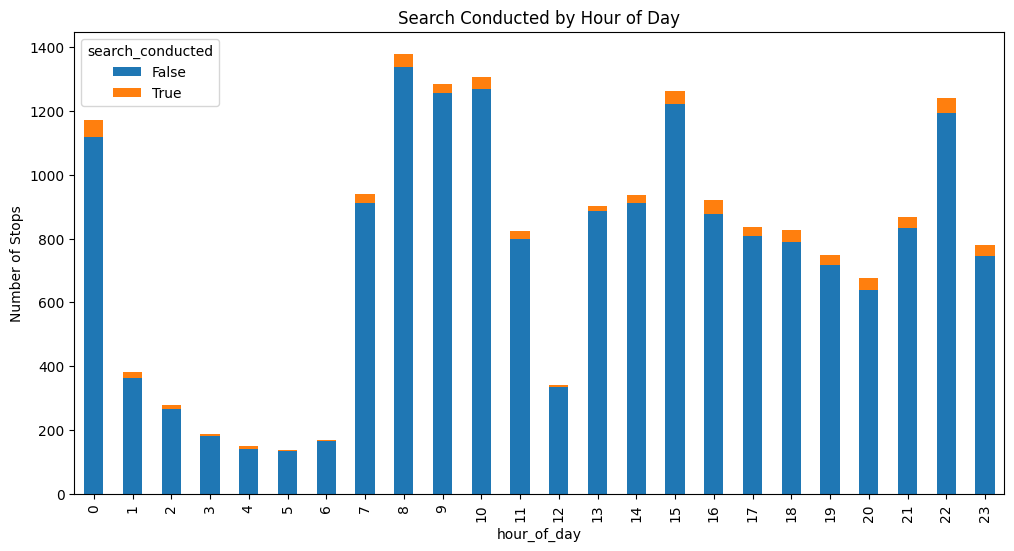

In [25]:
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour
search_time_counts = df_filtered.groupby(['hour_of_day', 'search_conducted']).size().unstack()
search_time_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Hour of Day')
plt.ylabel('Number of Stops')
plt.show()


<ipython-input-26-2cbe88cd1baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


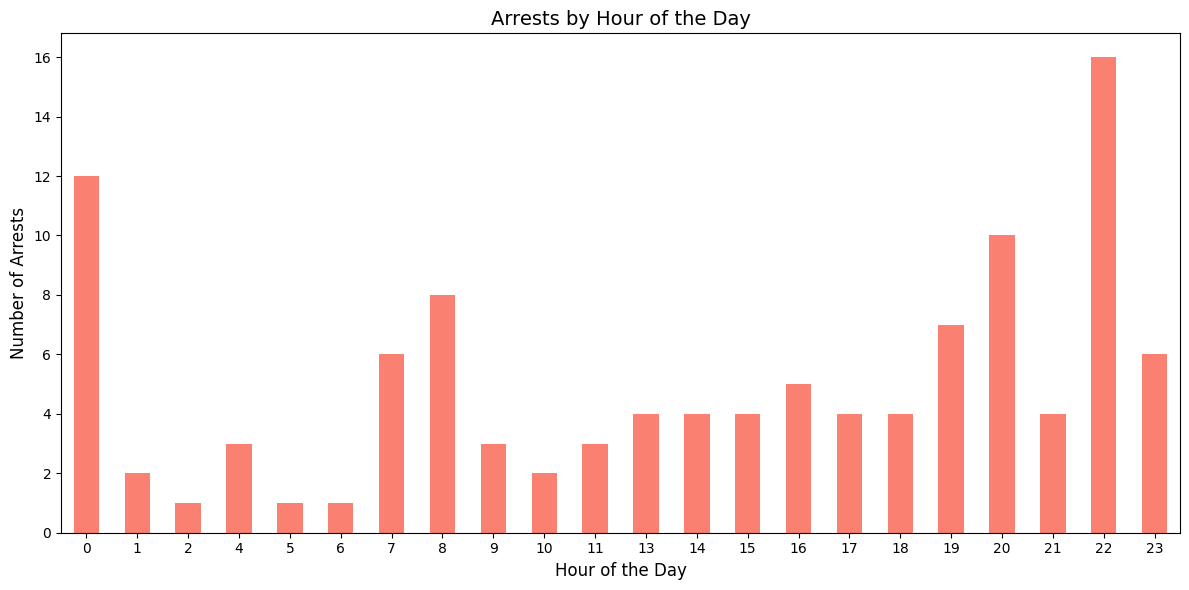

hour_of_day
0     12
1      2
2      1
4      3
5      1
6      1
7      6
8      8
9      3
10     2
11     3
13     4
14     4
15     4
16     5
17     4
18     4
19     7
20    10
21     4
22    16
23     6
dtype: int64


In [26]:

# Extract hour of day from the time column
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour

# Filter data for arrests (arrest_made == True)
df_arrests = df_filtered[df_filtered['arrest_made'] == True]

# Group by hour of day and arrest_made, then count the occurrences
search_time_counts = df_arrests.groupby('hour_of_day').size()

# Plot the filtered data (only arrests)
search_time_counts.plot(kind='bar', figsize=(12, 6), color='salmon')

# Customize plot with title and labels
plt.title('Arrests by Hour of the Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Arrests', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, display the counts for inspection
print(search_time_counts)

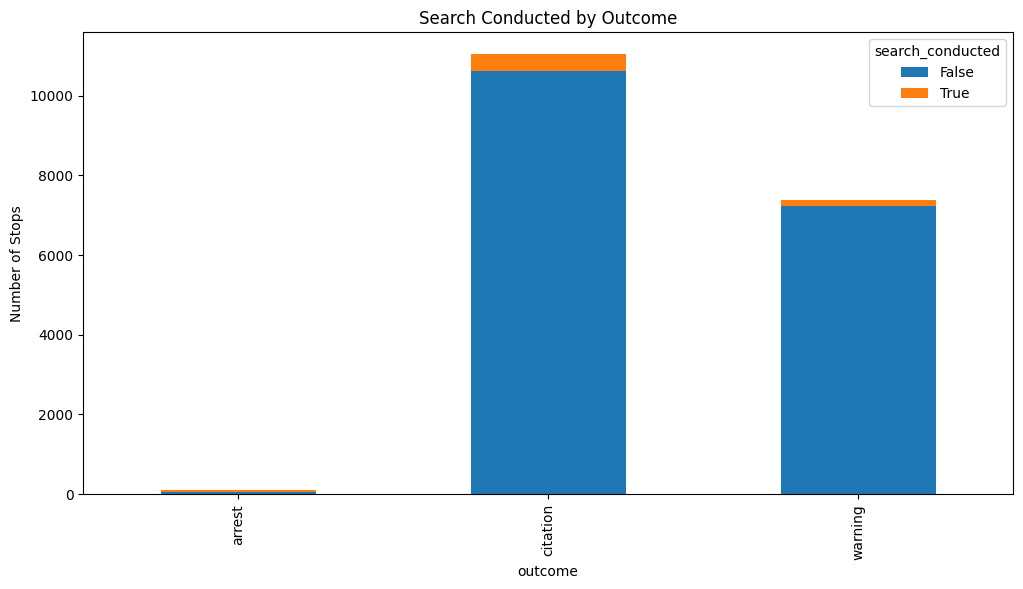

In [27]:
outcome_search_counts = df_filtered.groupby(['outcome', 'search_conducted']).size().unstack()
outcome_search_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Outcome')
plt.ylabel('Number of Stops')
plt.show()

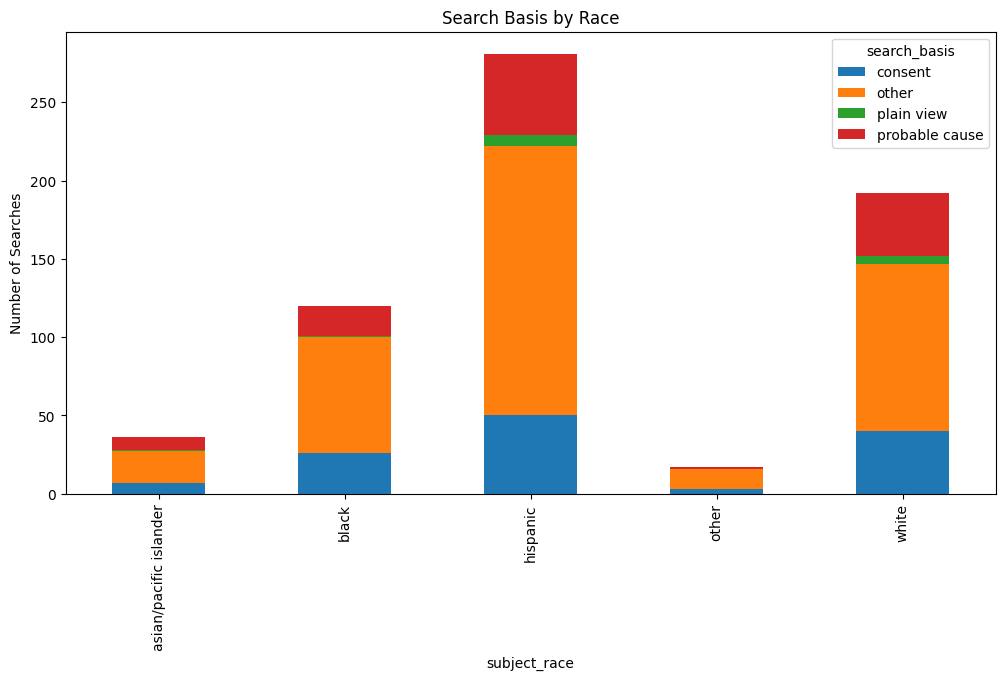

In [28]:
race_search_basis = df_filtered.groupby(['subject_race', 'search_basis']).size().unstack()
race_search_basis.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Race')
plt.ylabel('Number of Searches')
plt.show()

<ipython-input-29-1ff449cf32cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()


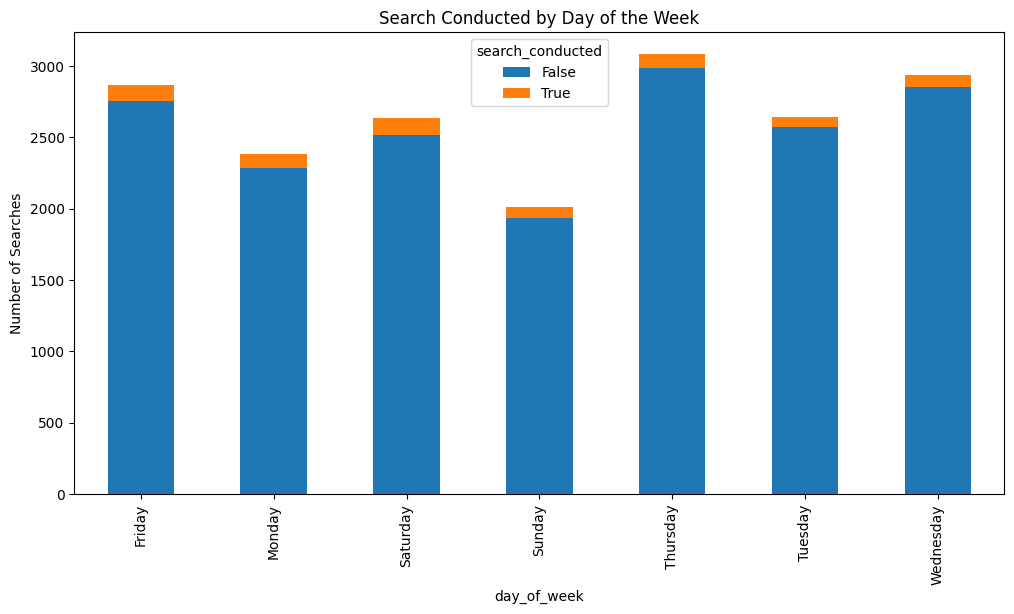

In [29]:
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()
search_by_day = df_filtered.groupby(['day_of_week', 'search_conducted']).size().unstack()
search_by_day.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Conducted by Day of the Week')
plt.ylabel('Number of Searches')
plt.show()

In [30]:
# arrest_by_reason = df_filtered.groupby('reason_for_stop')['arrest_made'].mean()
# arrest_by_reason.plot(kind='bar', figsize=(12, 6))
# plt.title('Arrest Rate by Reason for Stop')
# plt.ylabel('Arrest Rate')
# plt.show()

In [31]:
# arrest_by_reason_time = df_filtered.groupby(['reason_for_stop', 'hour_of_day'])['arrest_made'].mean()
# arrest_by_reason_time.unstack().plot(kind='line', figsize=(12, 6))
# plt.title('Arrest Rate by Reason for Stop and Hour of Day')
# plt.ylabel('Arrest Rate')
# plt.show()

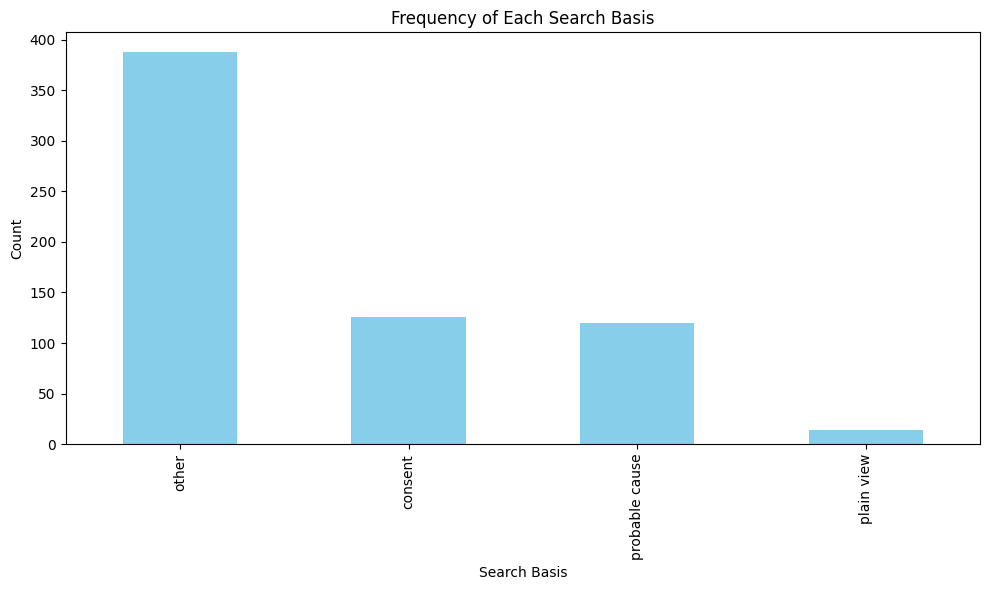

search_basis
other             388
consent           126
probable cause    120
plain view         14
Name: count, dtype: int64


In [32]:
# Count the occurrences of each search basis
search_basis_counts = df_filtered['search_basis'].value_counts()

# Plot the counts of each search basis
search_basis_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Frequency of Each Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Optionally, display the counts
print(search_basis_counts)








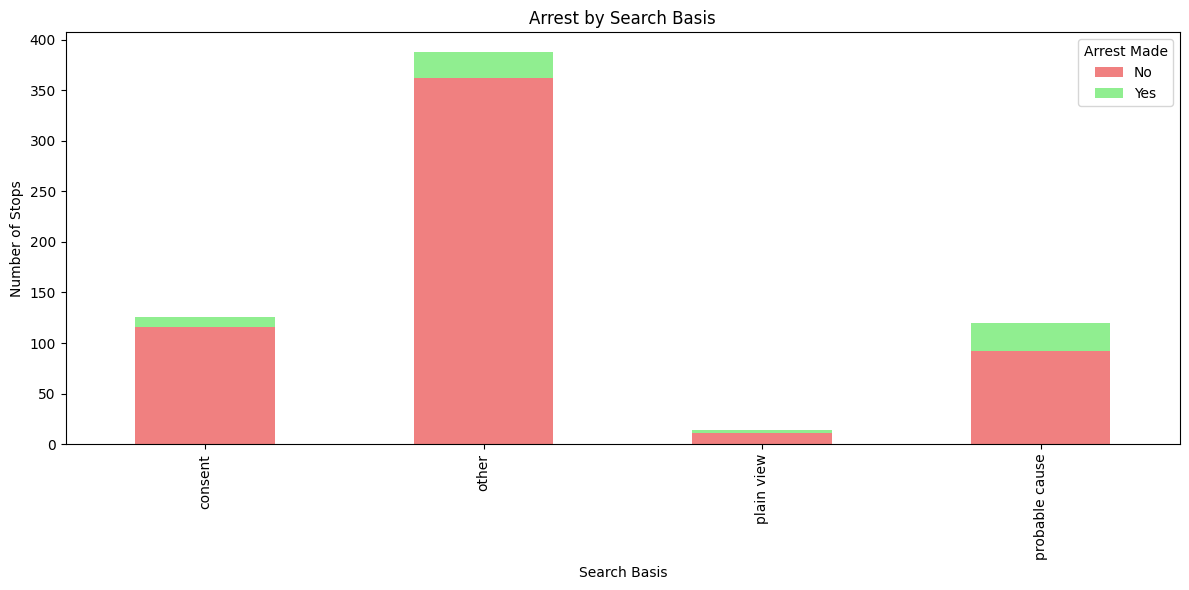

arrest_made     False  True 
search_basis                
consent           116     10
other             362     26
plain view         11      3
probable cause     92     28


In [33]:
# Group by search_basis and arrest_made to get counts
search_basis_arrest = df_filtered.groupby(['search_basis', 'arrest_made']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
search_basis_arrest.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightcoral', 'lightgreen'])
plt.title('Arrest by Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Number of Stops')
plt.legend(title='Arrest Made', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_arrest)


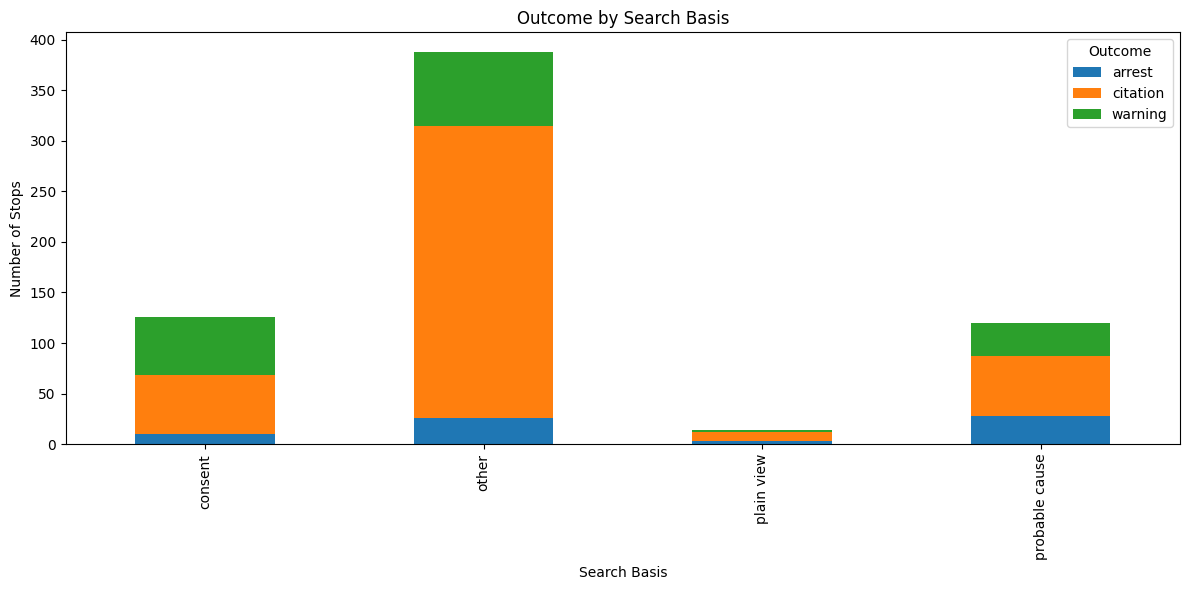

outcome         arrest  citation  warning
search_basis                             
consent             10        58       58
other               26       289       73
plain view           3         9        2
probable cause      28        59       33


In [34]:
# Group by search_basis and outcome to get counts
search_basis_outcome = df_filtered.groupby(['search_basis', 'outcome']).size().unstack(fill_value=0)

# Plot the data as a stacked bar chart
search_basis_outcome.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Outcome by Search Basis')
plt.xlabel('Search Basis')
plt.ylabel('Number of Stops')
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_outcome)


<ipython-input-35-fa45bb4f3fc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour


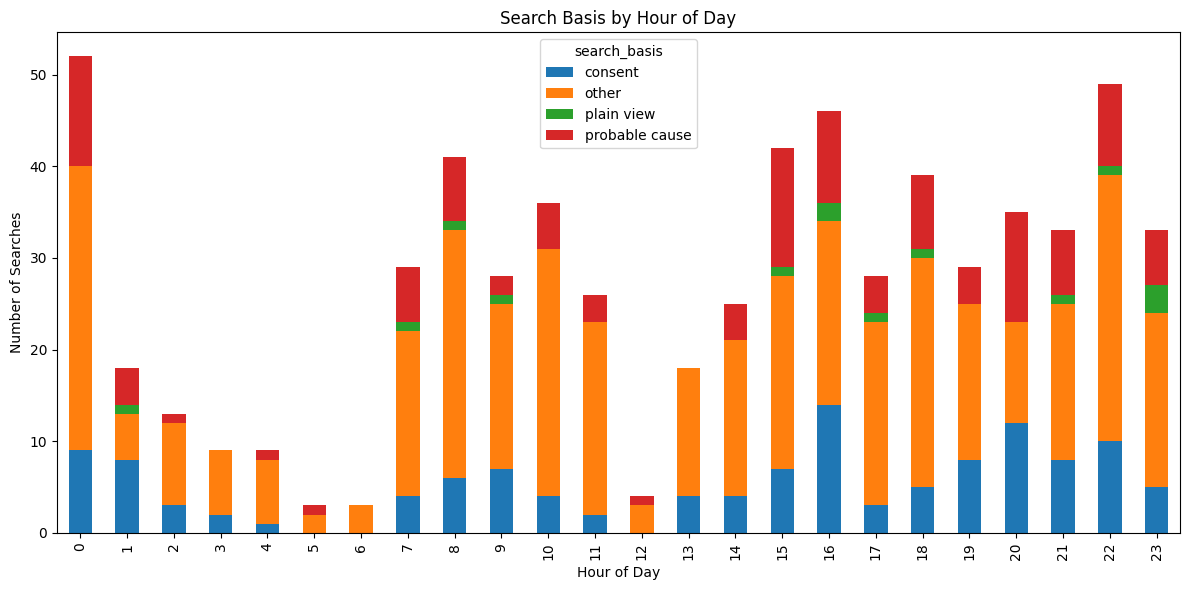

search_basis  consent  other  plain view  probable cause
hour_of_day                                             
0                   9     31           0              12
1                   8      5           1               4
2                   3      9           0               1
3                   2      7           0               0
4                   1      7           0               1
5                   0      2           0               1
6                   0      3           0               0
7                   4     18           1               6
8                   6     27           1               7
9                   7     18           1               2
10                  4     27           0               5
11                  2     21           0               3
12                  0      3           0               1
13                  4     14           0               0
14                  4     17           0               4
15                  7     21   

In [35]:
# Create an hour_of_day column
df_filtered['hour_of_day'] = pd.to_datetime(df_filtered['time'], format='%H:%M:%S').dt.hour

# Group by hour_of_day and search_basis to get counts
search_basis_hour = df_filtered.groupby(['hour_of_day', 'search_basis']).size().unstack(fill_value=0)

# Plot the data
search_basis_hour.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_hour)


<ipython-input-36-c92ff8dc934c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()


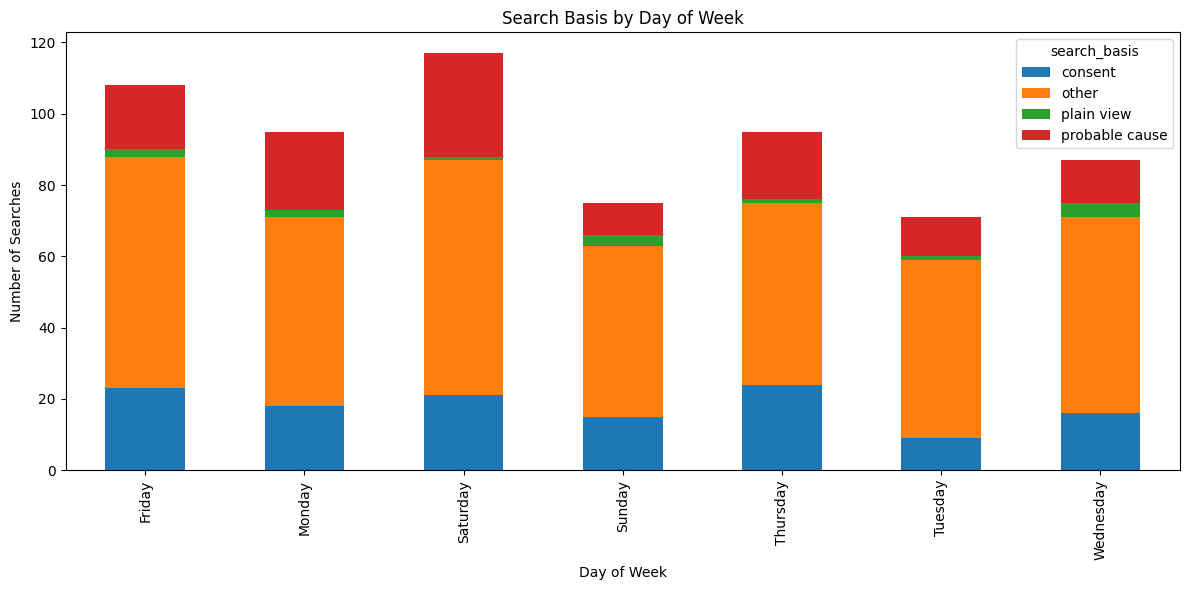

search_basis  consent  other  plain view  probable cause
day_of_week                                             
Friday             23     65           2              18
Monday             18     53           2              22
Saturday           21     66           1              29
Sunday             15     48           3               9
Thursday           24     51           1              19
Tuesday             9     50           1              11
Wednesday          16     55           4              12


In [36]:
# Create a day_of_week column
df_filtered['day_of_week'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d').dt.day_name()

# Group by day_of_week and search_basis to get counts
search_basis_day = df_filtered.groupby(['day_of_week', 'search_basis']).size().unstack(fill_value=0)

# Plot the data
search_basis_day.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Search Basis by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.show()

# Optionally, print the counts for inspection
print(search_basis_day)


<ipython-input-37-6c0e2b2b9c18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')
<ipython-input-37-6c0e2b2b9c18>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['date'].dt.day_name()


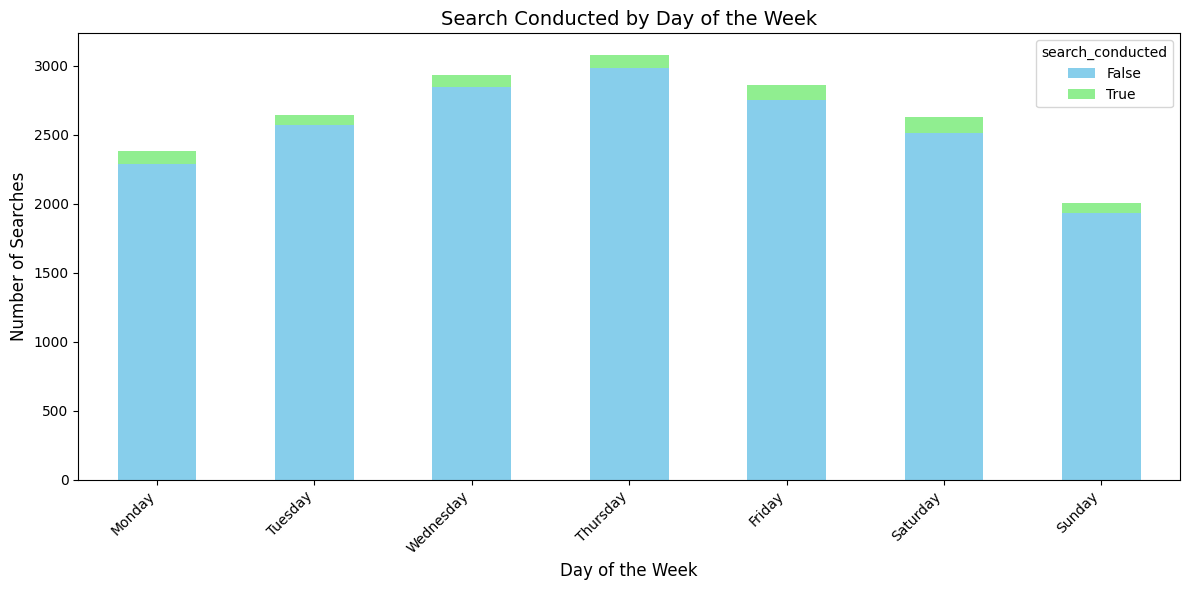

search_conducted  False  True 
day_of_week                   
Monday             2287     95
Tuesday            2573     71
Wednesday          2849     87
Thursday           2987     95
Friday             2754    108
Saturday           2514    117
Sunday             1934     75


In [37]:

# Ensure 'date' column is in datetime format
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%Y-%m-%d')

# Extract day of the week as a string (e.g., 'Monday', 'Tuesday', etc.)
df_filtered['day_of_week'] = df_filtered['date'].dt.day_name()

# Group data by day of the week and search_conducted (True/False)
search_by_day = df_filtered.groupby(['day_of_week', 'search_conducted']).size().unstack(fill_value=0)

# Reorder days of the week to ensure they appear in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
search_by_day = search_by_day.loc[day_order]

# Plot the data as a stacked bar chart
search_by_day.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'lightgreen'])

# Enhance plot with title, labels, and better formatting
plt.title('Search Conducted by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Searches', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure everything fits nicely

# Display the plot
plt.show()

# Optional: Display the grouped data for inspection
print(search_by_day)

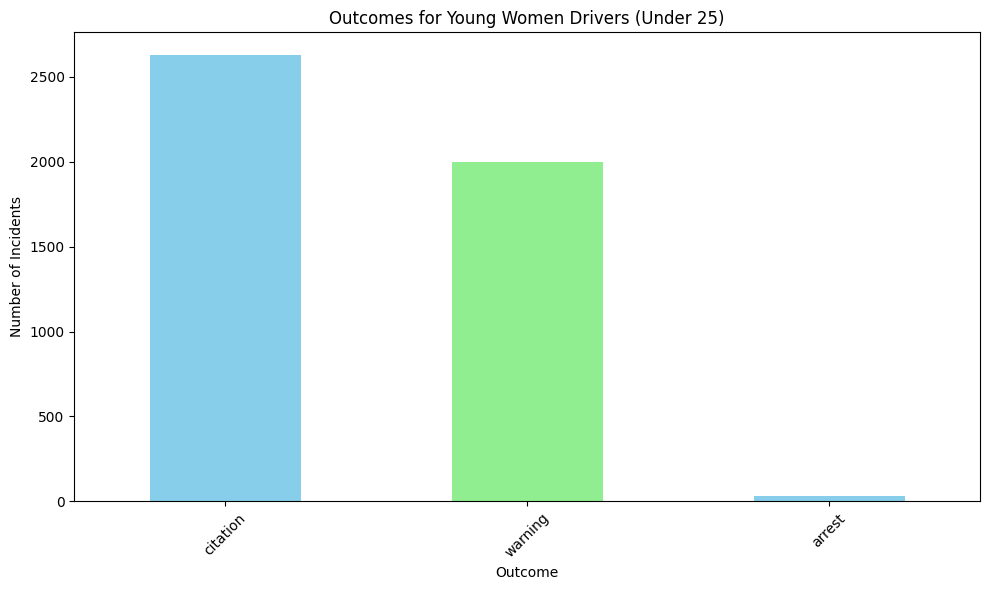

In [55]:
import matplotlib.pyplot as plt

# Filter for young women drivers (age < 25)
young_women_drivers = df_filtered[(df_filtered['subject_sex'] == 'male') & (df_filtered['subject_age'] < 30)]

# Count outcomes for young women drivers
outcome_counts = young_women_drivers['outcome'].value_counts()

    # Plot the bar chart
outcome_counts.plot(kind='bar', color=['skyblue', 'lightgreen'], figsize=(10, 6))

plt.title('Outcomes for Young Women Drivers (Under 25)')
plt.xlabel('Outcome')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


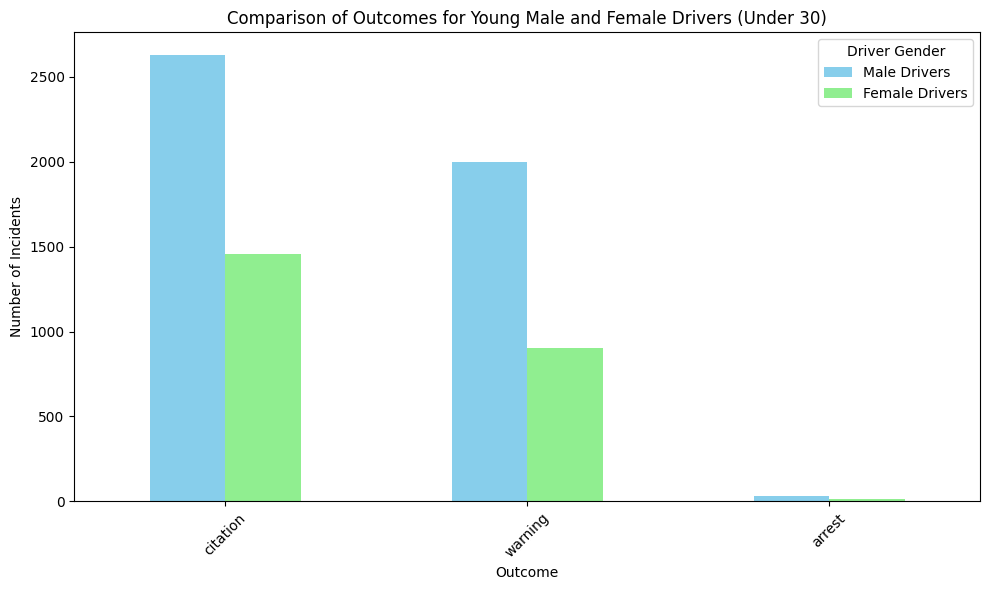

In [56]:
import matplotlib.pyplot as plt

# Filter for young male drivers (age < 30)
young_men_drivers = df_filtered[(df_filtered['subject_sex'] == 'male') & (df_filtered['subject_age'] < 30)]

# Filter for young female drivers (age < 30)
young_women_drivers = df_filtered[(df_filtered['subject_sex'] == 'female') & (df_filtered['subject_age'] < 30)]

# Count outcomes for young male and female drivers
outcome_counts_men = young_men_drivers['outcome'].value_counts()
outcome_counts_women = young_women_drivers['outcome'].value_counts()

# Combine the counts for comparison
outcome_counts_df = pd.DataFrame({
    'Male Drivers': outcome_counts_men,
    'Female Drivers': outcome_counts_women
}).fillna(0)  # Fill missing values with 0

# Plot the bar chart side by side
outcome_counts_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])

plt.title('Comparison of Outcomes for Young Male and Female Drivers (Under 30)')
plt.xlabel('Outcome')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Driver Gender')
plt.show()


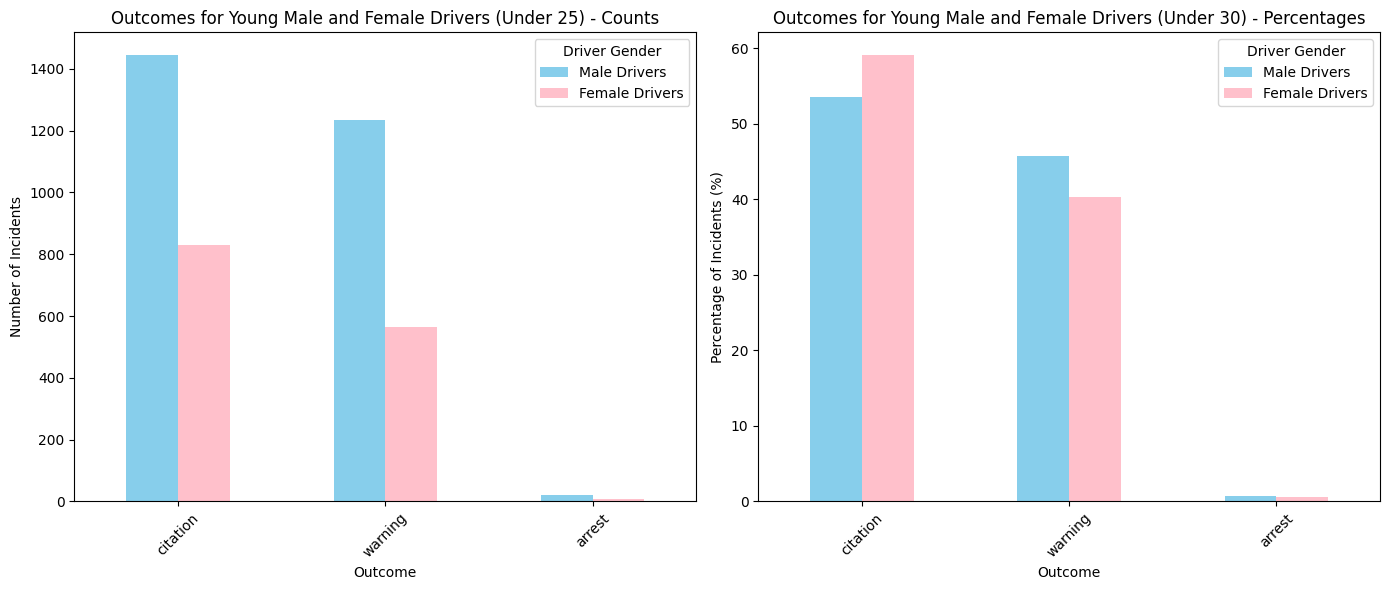

In [61]:
import matplotlib.pyplot as plt

# Filter for young male drivers (age < 30)
young_men_drivers = df_filtered[(df_filtered['subject_sex'] == 'male') & (df_filtered['subject_age'] < 25)]

# Filter for young female drivers (age < 30)
young_women_drivers = df_filtered[(df_filtered['subject_sex'] == 'female') & (df_filtered['subject_age'] < 25)]

# Count outcomes for young male and female drivers
outcome_counts_men = young_men_drivers['outcome'].value_counts()
outcome_counts_women = young_women_drivers['outcome'].value_counts()

# Combine the counts for comparison
outcome_counts_df = pd.DataFrame({
    'Male Drivers': outcome_counts_men,
    'Female Drivers': outcome_counts_women
}).fillna(0)  # Fill missing values with 0

# Calculate percentages
outcome_counts_percentage = outcome_counts_df / outcome_counts_df.sum() * 100

# Plot the bar chart side by side with counts and percentages
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot counts
outcome_counts_df.plot(kind='bar', ax=ax[0], color=['skyblue', 'pink'])
ax[0].set_title('Outcomes for Young Male and Female Drivers (Under 25) - Counts')
ax[0].set_xlabel('Outcome')
ax[0].set_ylabel('Number of Incidents')
ax[0].set_xticklabels(outcome_counts_df.index, rotation=45)
ax[0].legend(title='Driver Gender')

# Plot percentages
outcome_counts_percentage.plot(kind='bar', ax=ax[1], color=['skyblue', 'pink'])
ax[1].set_title('Outcomes for Young Male and Female Drivers (Under 30) - Percentages')
ax[1].set_xlabel('Outcome')
ax[1].set_ylabel('Percentage of Incidents (%)')
ax[1].set_xticklabels(outcome_counts_percentage.index, rotation=45)
ax[1].legend(title='Driver Gender')

# Display both plots side by side
plt.tight_layout()
plt.show()


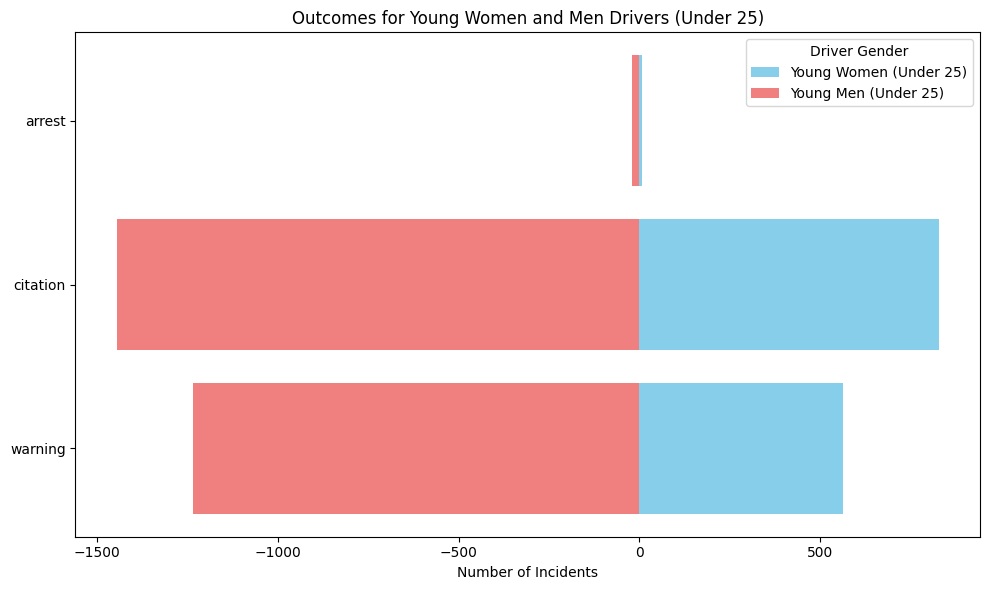

NameError: name 'young_women_drivers' is not defined